In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [100]:
df = pd.read_csv('../data/train_data_encoded_full_1.csv')
df.price = np.log(df.price)
print('shape:', df.shape)
df.head(5)

shape: (36944, 8)


,quality,color,clarity,price,weight_ES,depth_percent_ES,table_percent_ES,volume_ES
0,3,6,1,1.848927,-0.625000,0.357143,0.333333,-0.591767
1,4,5,5,2.217354,0.484375,0.571429,-0.333333,0.550637
2,4,4,3,2.077314,0.031250,-0.071429,0.666667,0.052269
3,2,3,1,2.124773,0.593750,0.928571,0.000000,0.624043
4,3,3,4,1.885250,-0.531250,0.285714,0.666667,-0.511469


In [101]:
df.isna().sum()

quality             0
color               0
clarity             0
price               0
weight_ES           0
depth_percent_ES    0
table_percent_ES    0
volume_ES           0
dtype: int64

In [102]:
#split dara train and test
X = df.drop(["price"], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())
print('\n')
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de entrenamiento
-----------------------
count    29555.000000
mean         2.033492
std          0.127236
min          1.760269
25%          1.918245
50%          2.039791
75%          2.140654
max          2.286659
Name: price, dtype: float64


Datos de testeo
-----------------------
count    7389.000000
mean        2.033002
std         0.128096
min         1.755614
25%         1.917217
50%         2.040571
75%         2.141359
max         2.286557
Name: price, dtype: float64


In [103]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [104]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 12, n_estimators = 100)
xg_reg.fit(X_train,y_train)

y_pred_gb_test = xg_reg.predict(X_test)
y_pred_gb_train= xg_reg.predict(X_train)

results_xg_boost_1 = metricas(y_test, y_train, y_pred_gb_test, y_pred_gb_train, "XG Boost 1")
results_xg_boost_1.style.background_gradient(cmap='coolwarm')

,MAE,MSE,RMSE,R2,set,modelo
0,0.010742,0.000203,0.014256,0.987613,test,XG Boost 1
1,0.007236,0.000096,0.009812,0.994053,train,XG Boost 1


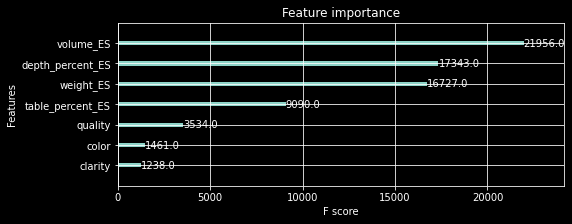

In [105]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 3]
plt.show()

In [106]:
df1 = df.drop(['table_percent_ES'], axis=1)
#split dara train and test
X = df1.drop(["price"], axis = 1)
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)
#model
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 12, n_estimators = 100)
xg_reg.fit(X_train,y_train)

y_pred_gb_test = xg_reg.predict(X_test)
y_pred_gb_train= xg_reg.predict(X_train)

results_xg_boost_1 = metricas(y_test, y_train, y_pred_gb_test, y_pred_gb_train, "XG Boost 1")
results_xg_boost_1.style.background_gradient(cmap='coolwarm')

,MAE,MSE,RMSE,R2,set,modelo
0,0.010324,0.000191,0.013804,0.988385,test,XG Boost 1
1,0.007141,0.000093,0.009657,0.994239,train,XG Boost 1


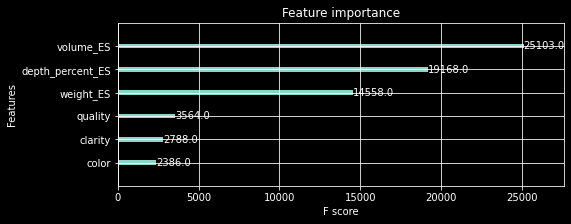

In [107]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 3]
plt.show()

In [108]:
df2 = df.drop(['depth_percent_ES'], axis=1)
#split dara train and test
X = df2.drop(["price"], axis = 1)
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)
#model
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 12, n_estimators = 100)
xg_reg.fit(X_train,y_train)

y_pred_gb_test = xg_reg.predict(X_test)
y_pred_gb_train= xg_reg.predict(X_train)

results_xg_boost_1 = metricas(y_test, y_train, y_pred_gb_test, y_pred_gb_train, "XG Boost 1")
results_xg_boost_1.style.background_gradient(cmap='coolwarm')

,MAE,MSE,RMSE,R2,set,modelo
0,0.010422,0.000194,0.013911,0.988204,test,XG Boost 1
1,0.007608,0.000105,0.010234,0.993530,train,XG Boost 1


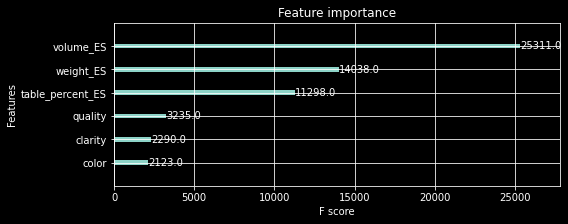

In [109]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 3]
plt.show()

In [121]:
df3 = df.drop(['quality'], axis=1)
#split dara train and test
X = df3.drop(["price"], axis = 1)
y = df3['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)
#model
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 12, n_estimators = 100)
xg_reg.fit(X_train,y_train)

y_pred_gb_test = xg_reg.predict(X_test)
y_pred_gb_train= xg_reg.predict(X_train)

results_xg_boost_1 = metricas(y_test, y_train, y_pred_gb_test, y_pred_gb_train, "XG Boost 1")
results_xg_boost_1.style.background_gradient(cmap='coolwarm')

,MAE,MSE,RMSE,R2,set,modelo
0,0.011502,0.000235,0.015331,0.985673,test,XG Boost 1
1,0.007586,0.000104,0.010221,0.993547,train,XG Boost 1


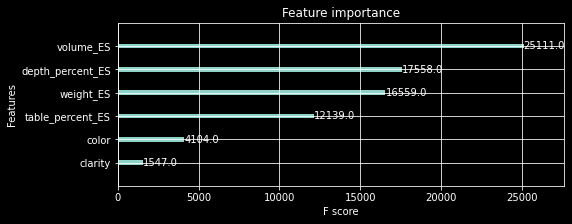

In [122]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8, 3]
plt.show()